# Imports
Run this code to import necessary modules. Note that the functions ``cost_function`` and ``gradient`` imported from module ``gd`` are stubs. You will need to fill in the code in ``gd.py``.

In [1]:
%matplotlib inline

%load_ext autoreload
%autoreload 2


import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

#from gd import cost_function, gradient, explicit_answer  # stubs

In [10]:
import numpy as np

def cost_function( x, y, theta0, theta1 ):
    """Compute the squared error cost function

    Inputs:
    x        vector of length m containing x values
    y        vector of length m containing y values
    theta_0  (scalar) intercept parameter
    theta_1  (scalar) slope parameter

    Returns:
    cost     (scalar) the cost
    """

    cost = 0.0

    ##################################################
    # TODO: write code here to compute cost correctly
    p = theta0 + x*theta1
    cost = np.sum(0.5*(p-y)**2)
    print(type(cost))



    ##################################################

    return cost


def gradient(x, y, theta_0, theta_1):
    """Compute the partial derivative of the squared error cost function

    Inputs:
    x          vector of length m containing x values
    y          vector of length m containing y values
    theta_0    (scalar) intercept parameter
    theta_1    (scalar) slope parameter

    Returns:
    d_theta_0  (scalar) Partial derivative of cost function wrt theta_0
    d_theta_1  (scalar) Partial derivative of cost function wrt theta_1
    """
    d_theta_0, d_theta_1 = 0, 0
    ##################################################
    # TODO: write code here to compute partial derivatives correctly
    d_theta_0 = np.sum(theta_0 + theta_1*x - y)
    d_theta_1 = np.sum(x*(theta_0 + theta_1*x - y))
    ##################################################

    return d_theta_0, d_theta_1 # return is a tuple

def explicit_answer(x, y):
    """Compute the explicit values of theta1 and theta2

    Inputs:
    x          vector of length m containing x values
    y          vector of length m containing y values

    Returns:
    theta_0  (scalar) intercept of line
    theta_1  (scalar) slope of line
    """
    theta1 = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum(np.power(x - np.mean(x), 2))
    theta0 = np.mean(y) - theta1 * np.mean(x)
    print("explicit: ",theta0, "   ", theta1)




    ##################################################
    # TODO: write code here to compute explicit values of theta_0 and theta_1
    ##################################################

# Create a simple data set

Run this cell to generate and plot some data from the linear model $y \approx -1 + 2x$, that is, $\theta_0 = -1$ and  $\theta_1 = 2$.

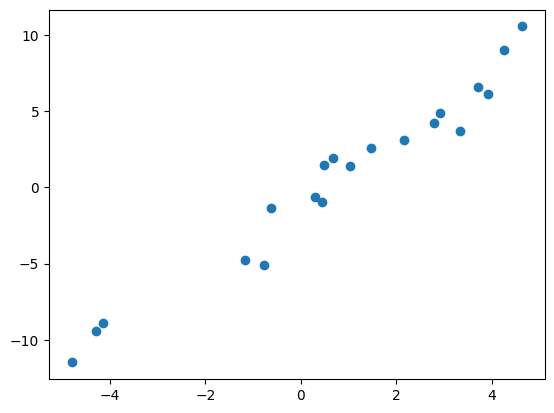

In [3]:
# Set the random seed so the program will always generate the same data
np.random.seed(0)

# Generate n random x values between -5 and 5
n = 20
x = 10 * np.random.rand(n) - 5

# Generate y values from the model y ~= 2x - 1
epsilon = np.random.randn(n)
y = -1 + 2*x + epsilon

plt.plot(x, y, marker='o', linestyle='none')
plt.show()


# TODO: implement the cost function
The squared error cost function is
$$\frac{1}{2} \sum_{i=1}^m \big(h_\theta(x^{(i)}) - y^{(i)}\big)^2.$$
$$h_\theta(x^{(i)})=\theta_0 + \theta_1 . x^{(i)}$$
Open the file ``gd.py`` and implement ``cost_function``. Then run this cell to test it out.

In [4]:
print(cost_function(x, y, 0,  1))   # should print 104.772951994
print(cost_function(x, y, 2, -1))   # should print 744.953822077
print(cost_function(x, y, -1, 2))   # should print 14.090816198

<class 'numpy.float64'>
104.77295199433607
<class 'numpy.float64'>
744.9538220768486
<class 'numpy.float64'>
14.090816198013721


# Plotting setup
Run this cell. It sets up a routine ``plot_model`` that will be called later to illustrate the progress of gradient descent.

In [5]:
# Construct a dense grid of (theta_0, theta_1) values
theta0_vals = np.linspace(-10, 10)
theta1_vals = np.linspace(-10, 10)
[THETA0, THETA1] = np.meshgrid(theta0_vals, theta1_vals)

# Define a cost function that has x and y "baked in"
def mycost(theta0, theta1):
    return cost_function(x, y, theta0, theta1)

# Now vectorize this cost function and apply it simultaneously to all
# pairs in dense grid of (theta_0, theta_1) values
mycost_vectorized = np.vectorize(mycost)
J_SURF = mycost_vectorized(THETA0, THETA1)

# Define the test inputs
x_test = np.linspace(-5, 5, 100)

fig = plt.figure(1, figsize=(10,4))

# Create the figure
def init_plot():
    fig.clf()

    # Build left subplot (cost function)
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.contour(THETA0, THETA1, J_SURF, 20)
    ax1.set_xlabel('Intercept theta_0')
    ax1.set_ylabel('Slope theta_1')
    ax1.set_xlim([-10, 10])
    ax1.set_ylim([-10, 10])

    # The data will be added later for these plot elements:
    line, = ax1.plot([], [])
    dot,  = ax1.plot([], [], marker='o')

    # Build right subplot (data + current hypothesis)
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(x, y, marker='o', linestyle='none')
    ax2.set_xlim([-6, 6])
    ax2.set_ylim([-10, 10])

    # The data will be added later for this:
    hyp, = ax2.plot( x_test, 0*x_test )

    return line, dot, hyp


# Define a function to update the plot
def update_plot(theta_0, theta_1, line, dot, hyp):
    line.set_xdata( np.append(line.get_xdata(), theta_0 ) )
    line.set_ydata( np.append(line.get_ydata(), theta_1 ) )
    dot.set_xdata([theta_0])
    dot.set_ydata([theta_1])
    hyp.set_ydata( theta_0 + theta_1 * x_test )

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.fl

<Figure size 1000x400 with 0 Axes>

# TODO: implement the gradient
1. Review the mathematical expressions for $\frac{\partial}{\partial \theta_0} J(\theta_0, \theta_1)$ and $\frac{\partial}{\partial \theta_1} J(\theta_0, \theta_1)$ for our model and cost funtion.
1. Implement the function ``gradient`` in ``gd.py`` to return these two partial derivatives.

Then run this cell to test your code:

In [6]:
print(gradient(np.array([1, 2]), np.array([0, 1]), 0,  1)) # should print (2, 3)
print(gradient(x, y, 0,  1))   # should print (3.569176215534113, -163.58239266243288)
print(gradient(x, y, 2, -1))   # should print (10.94724640649514, -462.08205479805036)

(2, 3)
(3.569176215534111, -163.58239266243288)
(10.94724640649514, -462.0820547980504)


# TODO: implement gradient descent

1. In this cell you will implement gradient descent:
    * Select a step size
    * Run for a fixed number of iterations (say, 20 or 200)
    * Update `theta_0` and `theta_1` using the partial derivatives (**Hint**: use the function ``gradient`` in ``gd.py``)
    * Record the value of the cost function attained in each iteration of gradient descent so you can examine its progress.

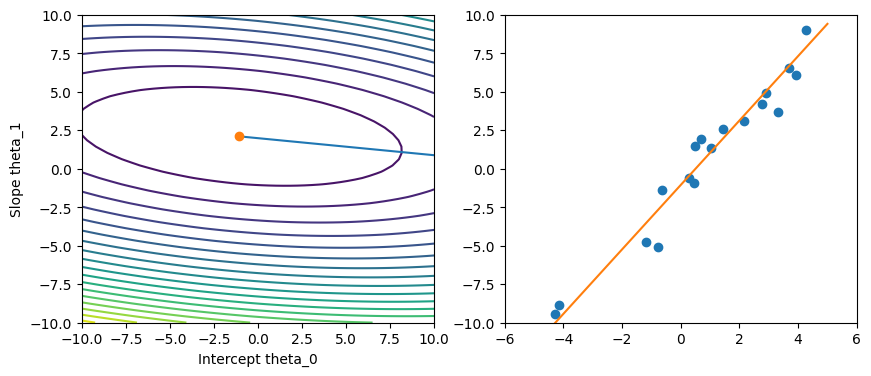

13.425042793510611


In [14]:
line, dot, hyp = init_plot()

iters = 200  # change as needed

#used x and y initialized in one of the cells above

####################################################################################
# TODO: intialize theta_0, theta_1, step size, and an array to save the cost function
###################################################################################
step_size = 0.005
theta_0 = 1000
theta_1 = 654
cost_array = []


for i in range(0, iters):
    cost_ = cost_function(x, y, theta_0, theta_1)
    cost_array.append(cost_)
    d_theta_0, d_theta_1 = gradient(x, y, theta_0, theta_1)
    theta_0 = theta_0 - step_size*d_theta_0
    theta_1 = theta_1 - step_size*d_theta_1

    #KEEP THIS CODE: this code will display progress of the
    #algorithm as it runs
    clear_output(wait=True)
    update_plot(theta_0, theta_1, line, dot, hyp)
    display(fig)

weights = []
weights.append(theta_0)
weights.append(theta_1)

    #################################################################################
    # TODO:
    #    - write code to get partial derivatives (hint: call gradient in gd.py)
    #    - update theta_0 and theta_1 with the partial derivatives and step size
    #    - save cost function at each step (hint: call a function we gave you above)
    #################################################################################
print(cost_)

# TODO: compare gradient descent thetas with explicit thetas
complete ``explicit_answer`` function in ``gd.py`` and print results of both ways.

In [8]:
#np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum(np.power(x - np.mean(x), 2))

In [9]:
#experiment(100,0.005)

In [16]:
############################################
# TODO: Write code print both results

explicit_answer(x, y)
print("gradient: ",weights[0], "   ", weights[1])
###########################################

explicit:  -1.0702535799250916     2.093491126207114
gradient:  -1.0702488153856113     2.0934905988523718


# TODO: assess convergence
Plot the iteration (x-axis) vs. cost.

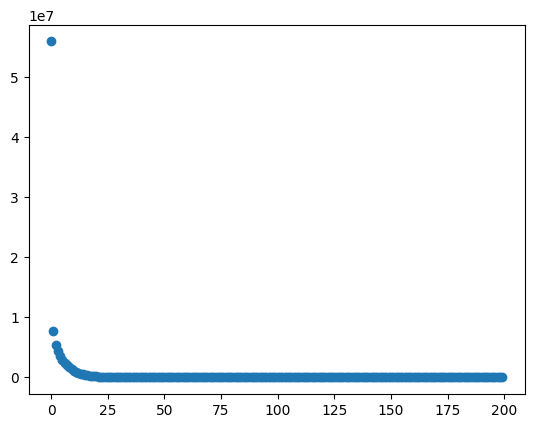

In [17]:
############################################
# TODO: Write code to plot and display here
#iters = 50
iter_arr = []
for i in range (iters):
  iter_arr.append(i)
plt.plot(iter_arr, cost_array, marker='o', linestyle='none')
plt.show()
###########################################

 Did the algorithm converge? (Converging means it found the actual setting of $\theta$ that minimizes the cost. If the cost went up or did not go down as far as it could, it did not converge.)

** *italicized text* *Write your answer here*. **
the algorithm did converge and found the best weights possible to minimize the cost function.


# TODO: experiment with step size

After you have completed the implementation, do some experiments with different numbers of iterations and step sizes to assess convergence of the algorithm. Report the following:
* A step size for which the algorithm converges to the minimum in at most 200 iterations
* A step size for which the algorithm converges, but it takes more than 200 iterations
* A step size for which the algorithm does not converge, no matter how many iterations are run

In [20]:
import numpy as np
############################################
# TODO: Put experimental code here
def experiment(iters, step_size):
  line, dot, hyp = init_plot()

  iters = iters  # change as needed

  #used x and y initialized in one of the cells above

  ####################################################################################
  # TODO: intialize theta_0, theta_1, step size, and an array to save the cost function
  ###################################################################################
  step_size = step_size
  theta_0 = 1000
  theta_1 = 654
  cost_array = []


  for i in range(0, iters):
      cost_ = cost_function(x, y, theta_0, theta_1)
      cost_array.append(cost_)
      d_theta_0, d_theta_1 = gradient(x, y, theta_0, theta_1)
      theta_0 = theta_0 - step_size*d_theta_0
      theta_1 = theta_1 - step_size*d_theta_1

      #KEEP THIS CODE: this code will display progress of the
      #algorithm as it runs
      clear_output(wait=True)
      update_plot(theta_0, theta_1, line, dot, hyp)
      display(fig)

      #################################################################################
      # TODO:
      #    - write code to get partial derivatives (hint: call gradient in gd.py)
      #    - update theta_0 and theta_1 with the partial derivatives and step size
      #    - save cost function at each step (hint: call a function we gave you above)
      #################################################################################
  ###########################################
  return cost_
#  return(cost_array[-1])



#A step size for which the algorithm converges to the minimum in at most 200 iterations:



# 1. algorithm converges with 100 iters (less than 200) with step size of 0.005:

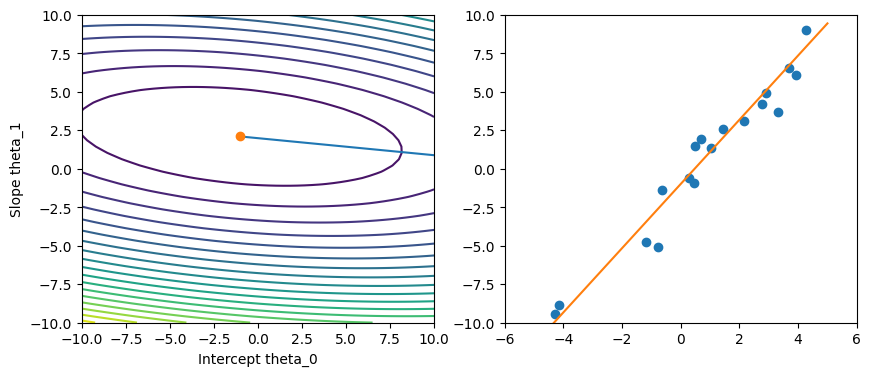

13.473768407714955


In [21]:
print(experiment(100, 0.005))

# 2- algorithm does not converge with 200 iters and a step size of 0.001
# but it does converge with 500 iters and a step size of *0.001* :

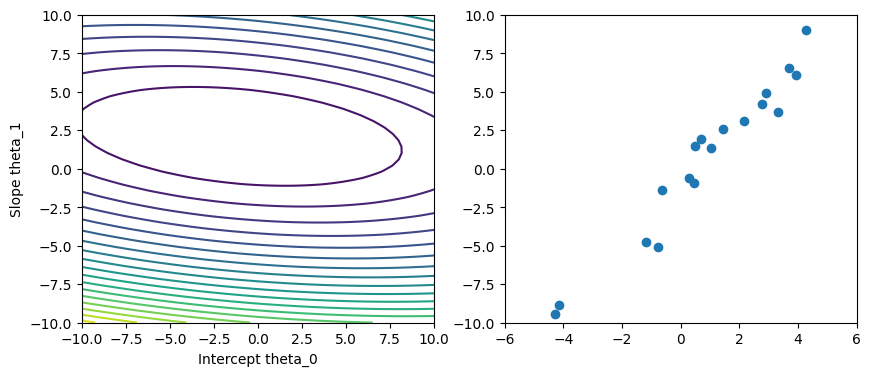

5209.611072953081


In [23]:
print(experiment(200,0.001))

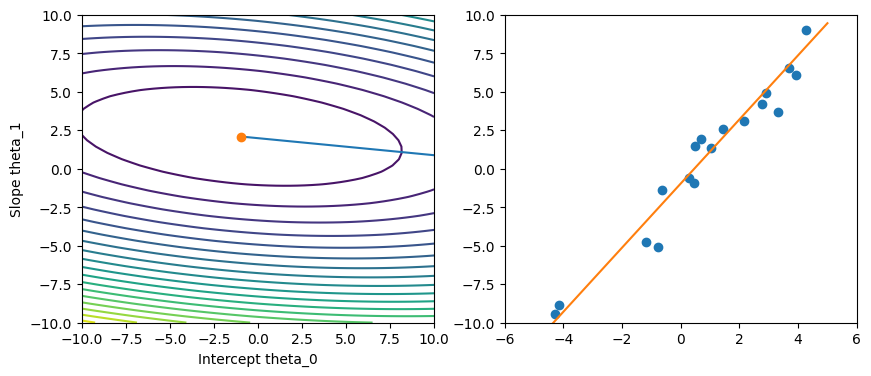

13.510337378024932


In [24]:
print(experiment(500,0.001))

# 3- the algo does not converge with a step size of 1:



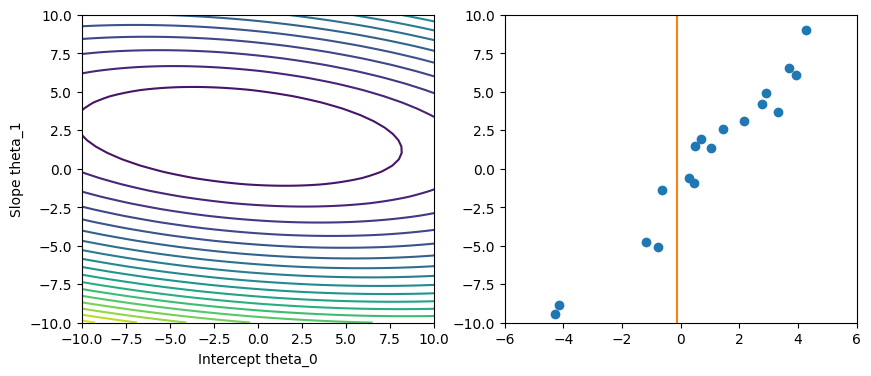

inf


In [25]:
print(experiment(100,1))

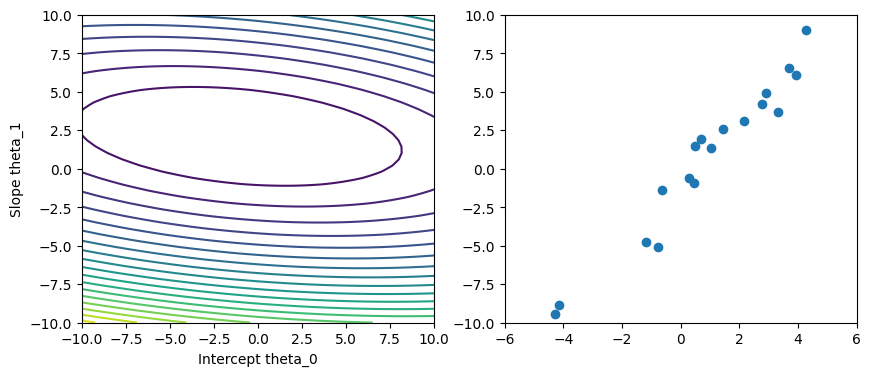

nan


In [26]:
print(experiment(500,1))

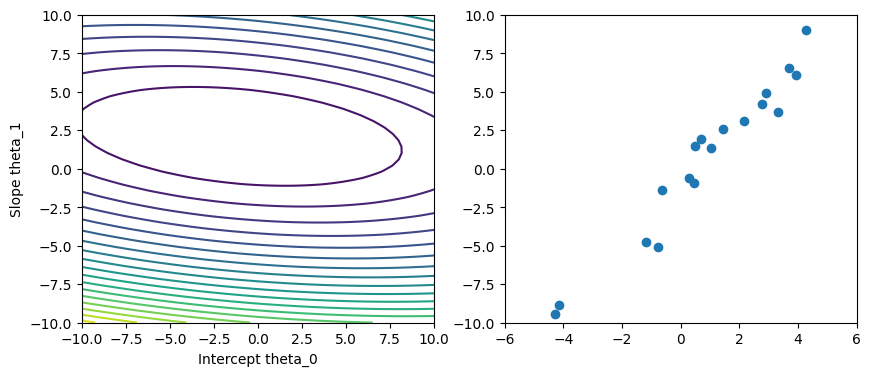

nan


In [27]:
print(experiment(1000,1))



```
# This is formatted as code
```

algorithm converges with 100 iters (less than 200) with step size of 0.005

algorithm does not converge with 200 iters and a step size of 0.001
but it does converge with 500 iters and a step size of 0.001

the algo does not converge with a step size of 1